<a href="https://colab.research.google.com/github/Fazril1/Machine-Learning/blob/main/Tugas-Tugas/Tugas%20Minggu%202/Polynomial_Regression_EconomicOfScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ibnu Fazril 1103201241 Contoh Polynomial Regression EconomicOfScale

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Lokasi file dataset di Google Drive
file_path = '/content/drive/MyDrive/Dataset/EconomiesOfScale.csv'

# Membaca dataset CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
print(df.head())

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [ ]:
df.head(17)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

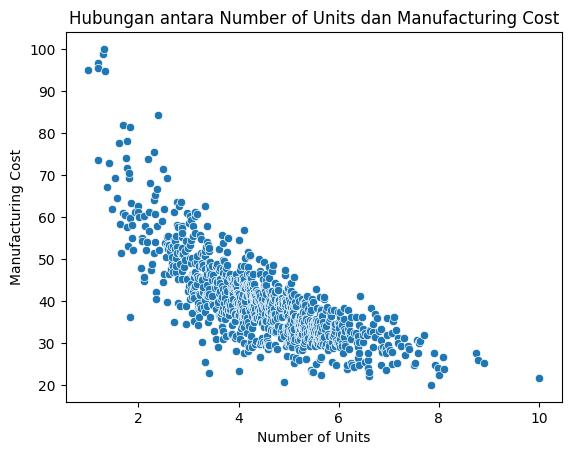

In [ ]:
# Membuat scatter plot
sns.scatterplot(data=df, x="Number of Units", y="Manufacturing Cost")

# Memberikan judul dan label sumbu
plt.title("Hubungan antara Number of Units dan Manufacturing Cost")
plt.xlabel("Number of Units")
plt.ylabel("Manufacturing Cost")

# Menampilkan plot
plt.show()


In [ ]:
# Kolom label (variabel dependen)
x = df["Number of Units"].values

# Kolom target (variabel independen)
y = df["Manufacturing Cost"].values

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

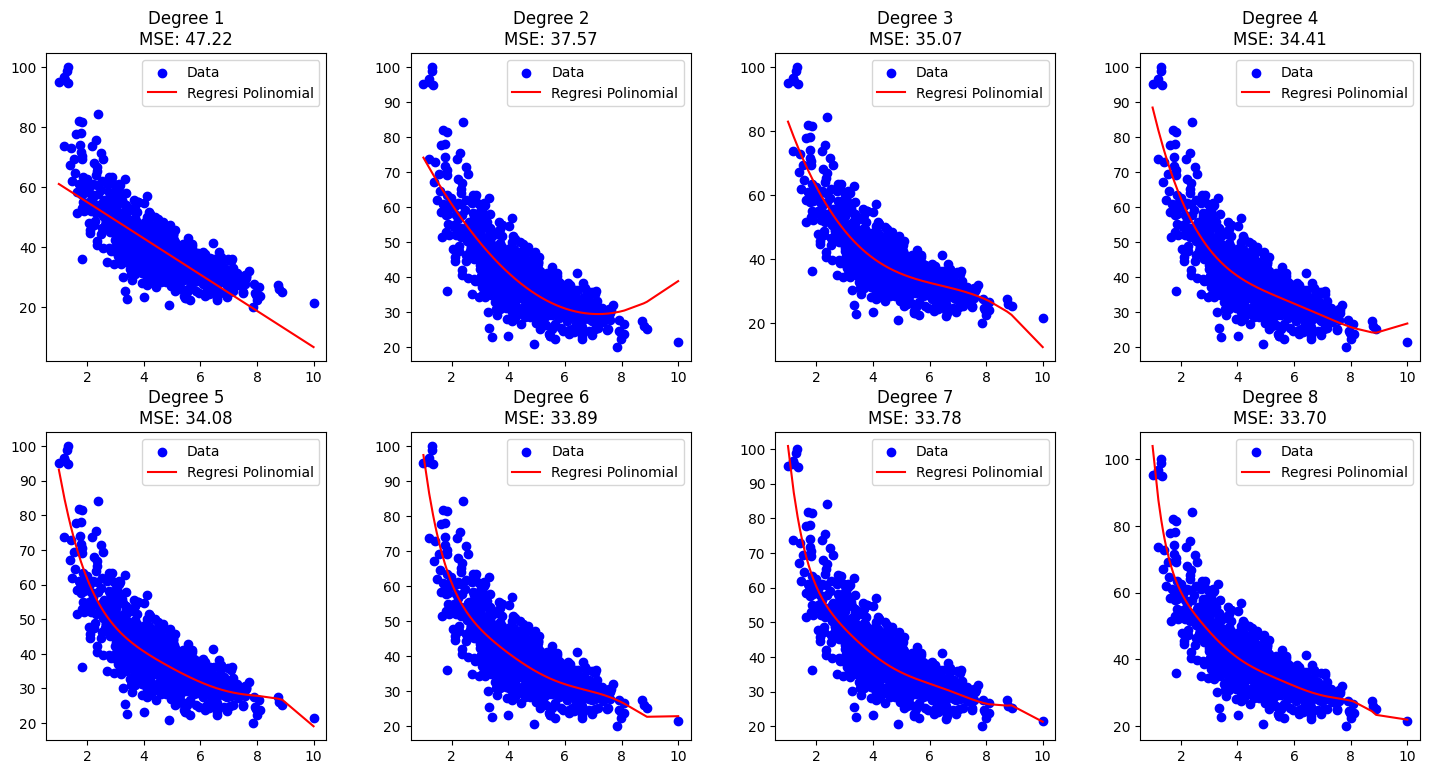

Degree 1: MSE = 47.22
Degree 2: MSE = 37.57
Degree 3: MSE = 35.07
Degree 4: MSE = 34.41
Degree 5: MSE = 34.08
Degree 6: MSE = 33.89
Degree 7: MSE = 33.78
Degree 8: MSE = 33.70


In [ ]:
# Menginisialisasi array derajat polinomial yang akan diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8]

# Membagi jendela gambar menjadi 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

# Menginisialisasi variabel untuk menyimpan nilai-nilai MSE
mse_values = []

for i, degree in enumerate(degrees):
  # Membuat objek PolynomialFeatures dengan derajat tertentu
  polynomial_features = PolynomialFeatures(degree=degree)

  # Mengubah fitur independen 'x' menjadi bentuk polinomial
  x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))

  # Melatih model regresi linier pada fitur polinomial
  model = LinearRegression()
  model.fit(x_poly, y)

  # Memprediksi hasil
  y_pred = model.predict(x_poly)

  # Menghitung MSE (Mean Squared Error)
  mse = mean_squared_error(y, y_pred)
  mse_values.append(mse)

  # Plot hasil regresi polinomial
  ax = axes[i // 4, i % 4]
  ax.scatter(x, y, label='Data', color='blue')
  ax.plot(x, y_pred, color='red', label='Regresi Polinomial')
  ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
  ax.legend()

# Menampilkan plot
plt.show()

# Menampilkan MSE untuk setiap derajat
for degree, mse in zip(degrees, mse_values):
  print(f'Degree {degree}: MSE = {mse:.2f}')
